In [16]:
import json
from sklearn.datasets import load_iris
import pandas as pd

In [36]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import skewnorm, skew, probplot, norm
from sklearn.preprocessing import StandardScaler

def outlier_range(dataset, column):
    """
    Calculate the range for detecting outliers in a given column of a dataset using the IQR method.

    Parameters:
    dataset (pandas.DataFrame): The dataset containing the column of interest.
    column (str): The column name in the dataset for which to calculate the outlier range.

    Returns:
    tuple: A tuple containing the minimum and maximum values for the acceptable range of the column.
    """
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)

    IQR = Q3 - Q1

    min_value = (Q1 - 1.5 * IQR)
    max_value = (Q3 + 1.5 * IQR)

    return min_value, max_value

def dist_box(dataset, column):
    """
    Calculates and prints the mean, mode, and median for the specified column.
    It also calculates the outlier range using the IQR method and displays the minimum and maximum
    values that define the outlier boundaries. Finally, it generates a distribution plot and a boxplot
    to visually analyze the data distribution and detect any outliers.

    Parameters:
    dataset (pandas.DataFrame): The dataset containing the column to be analyzed.
    column (str): The column name for which the distribution and boxplot are generated.

    Outputs:
    Prints the mean, mode, and median of the specified column, as well as the calculated outlier boundaries.
    Displays two plots:
      - A distribution plot (histogram)
      - A boxplot with outliers marked
    """
    with warnings.catch_warnings():
       warnings.simplefilter("ignore")

       mean   = dataset[column].mean()
       mode   = dataset[column].mode()[0]
       median = dataset[column].median()

       print(f'Mean: {mean} \nMode: {mode} \nMedian: {median}')

       min_value, max_value = outlier_range(dataset, column)

       print("The minimum value up to which outliers exist: {}".format(min_value))
       print("The maximum value after which outliers exist: {}".format(max_value))

       fig = px.histogram(dataset,
                   x = f'{column}',
                   marginal = 'box',
                   title = f'Distribution of {column}')
       fig.update_layout(bargap = 0.1)
       fig.show()

def plot_multiple_skeweness(df, columns = None, rows = 2, cols = 2):
    """
    Plot skewness for multiple columns in a dataframe
    """
    # Calculate how many plots we need
    n_plots = len(columns)

    # Calculate number of figures needed
    n_figures = (n_plots + (rows * cols - 1)) // (rows * cols)

    for fig_num in range(n_figures):
        # Create a figure with subplots
        fig_size = (cols * 8, rows * 4)
        fig, axes = plt.subplots(rows, cols * 2, figsize=fig_size)

        # Flatten the axes array for easier indexing
        axes_flat = axes.flatten()

        # Plot columns for this figure
        start_idx = fig_num * (rows * cols)
        end_idx = min(start_idx + (rows * cols), n_plots)

        for i, idx in enumerate(range(start_idx, end_idx)):
            col_name = columns[idx]
            data = df[col_name].dropna()

            # Get histogram axis and probplot axis
            hist_ax = axes_flat[i * 2]
            prob_ax = axes_flat[i * 2 + 1]

            # Plot histogram
            sns.histplot(data=data, kde=True, ax=hist_ax)
            hist_ax.set_title(f"{col_name} (Skewness: {round(skew(data), 4)})")

            # Plot probplot
            probplot(data, dist=norm, plot=prob_ax)
            prob_ax.set_title(f"Probplot for {col_name}")

        # Remove any unused subplots
        for j in range((end_idx - start_idx) * 2, rows * cols * 2):
            fig.delaxes(axes_flat[j])

        plt.tight_layout()
        plt.show()

In [53]:
iris_sklearn = load_iris()

iris_df = pd.DataFrame(data=iris_sklearn.data, columns=iris_sklearn.feature_names)
iris_df['target'] = iris_sklearn.target

In [54]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
iris_df.shape

(150, 5)

In [22]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [23]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [32]:
numeric_cols = list(iris_df.columns)
numeric_cols.remove('target')

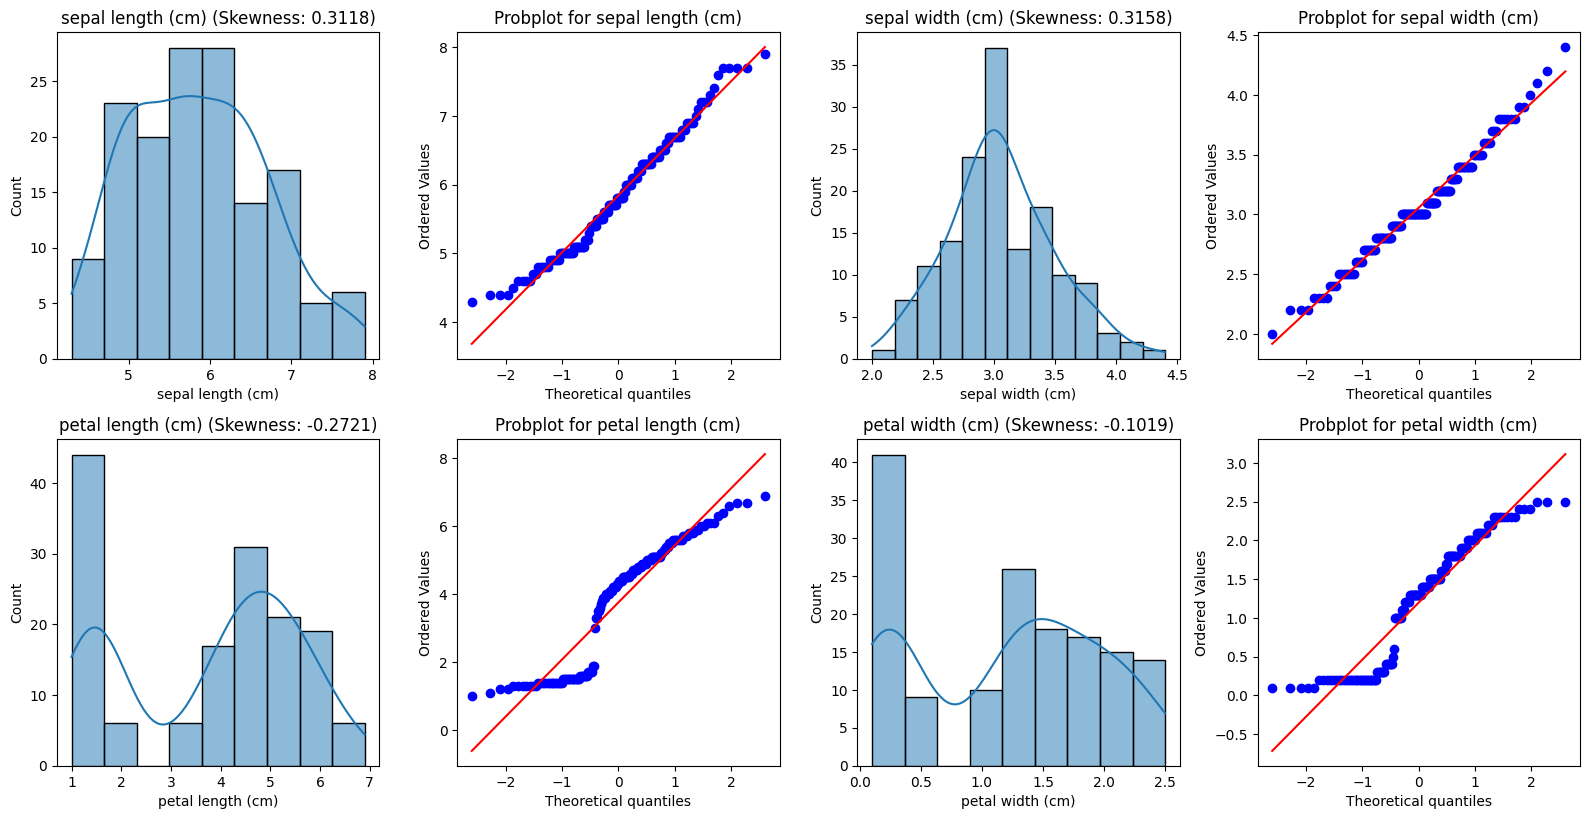

In [33]:
plot_multiple_skeweness(iris_df, columns = numeric_cols, rows = 4, cols = 2)

In [37]:
data_scaled = iris_df.copy()

standard_scaler = StandardScaler()

data_scaled[numeric_cols] = standard_scaler.fit_transform(data_scaled[numeric_cols])

In [55]:
duplicated_df = iris_df[iris_df.duplicated()]
display(duplicated_df.shape, duplicated_df)

(1, 5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,2


In [56]:
train_df = pd.read_csv("data/iris_train_data.csv")
test_df = pd.read_csv("data/iris_inference_data.csv")